<a href="https://www.kaggle.com/code/poojach7611/maternal-health?scriptVersionId=157756129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv
/kaggle/input/maternal-health-unseen/Maternal Health (Responses) - Form Responses 1.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#  LevelEncoding

In [5]:
from sklearn import preprocessing
import pickle
from sklearn.preprocessing import LabelEncoder



In [6]:
categorical_columns = ['RiskLevel']

encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)

In [7]:
df['RiskLevel'].unique()

array([0, 1, 2])

# Prediction On Diffrerent Model
1. Random Forest
2. SVM
3. XGBoost
4. Decision Tree

In [8]:
X= df.drop('RiskLevel', axis=1)
y= df['RiskLevel']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.20 ,random_state=45)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_model= RandomForestClassifier(random_state=45)
rf_model.fit(X_train, y_train)
rf_y_pre=rf_model.predict(X_test)

In [14]:
from sklearn import metrics

In [15]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pre)

In [16]:
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 84.73%


In [17]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=45)  
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {rf_accuracy * 100:.2f}%")

SVM Accuracy: 84.73%


In [18]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)
xgboost_classifier.fit(X_train, y_train)
xgboost_y_pred = xgboost_classifier.predict(X_test)

xgboost_accuracy = metrics.accuracy_score(y_test, xgboost_y_pred)
print(f"XGBoost Accuracy: {xgboost_accuracy * 100:.2f}%")

XGBoost Accuracy: 83.74%


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=45)
dtc_model.fit(X_train, y_train)
dtc_y_pred = dtc_model.predict(X_test)

In [20]:
dtc_accuracy = metrics.accuracy_score(y_test, dtc_y_pred)

In [21]:
print(f"DecisionTree Accuracy: {dtc_accuracy * 100:.2f}%")

DecisionTree Accuracy: 86.21%


# Confusion Metrics For All Models

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_scores(model, actual, predicted):
    print(f"Model: {model}")


    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    conf_matrix = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: Random Forest
Accuracy: 84.73%


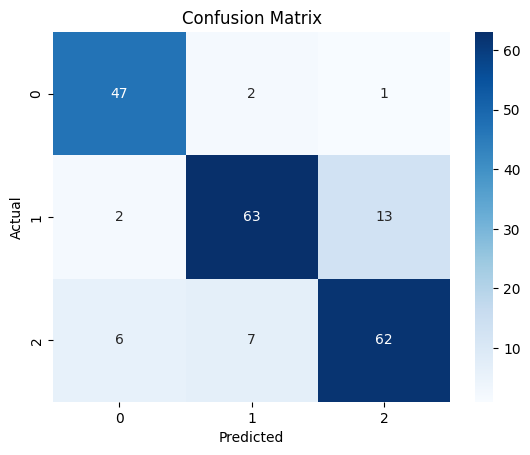

Model: SVM
Accuracy: 66.01%


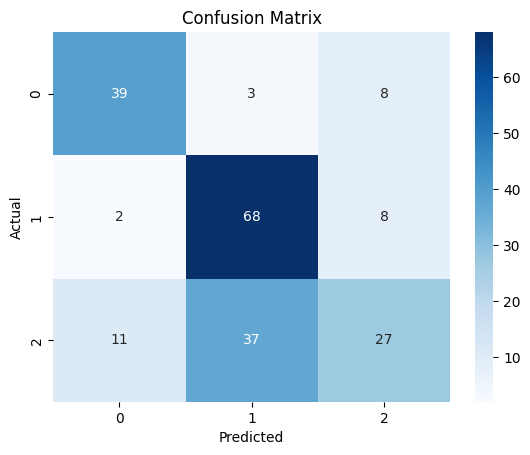

Model: XGBoost
Accuracy: 83.74%


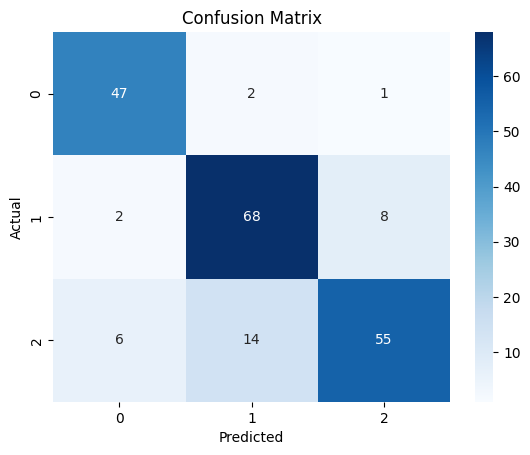

Model: Decision Tree
Accuracy: 86.21%


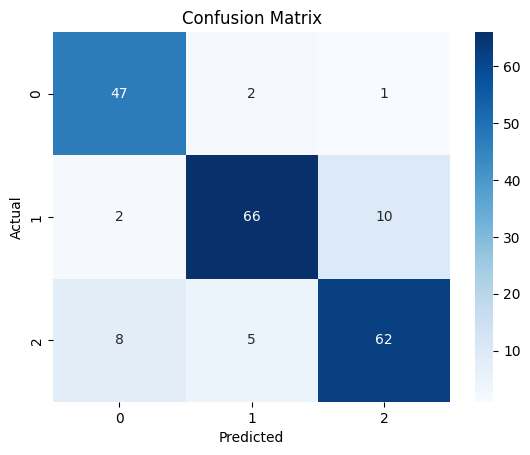

In [23]:
get_scores("Random Forest", y_test, rf_y_pre)
get_scores("SVM", y_test, svm_y_pred)
get_scores("XGBoost", y_test, xgboost_y_pred)
get_scores("Decision Tree", y_test, dtc_y_pred)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pre))
print(classification_report(y_test, svm_y_pred))
print(classification_report(y_test, xgboost_y_pred))
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        50
           1       0.88      0.81      0.84        78
           2       0.82      0.83      0.82        75

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.63      0.87      0.73        78
           2       0.63      0.36      0.46        75

    accuracy                           0.66       203
   macro avg       0.67      0.67      0.65       203
weighted avg       0.66      0.66      0.64       203

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        50
           1       0.81      0.87      0.84        78
           2       0.86      0.73      0.79        75

    accuracy        

In [25]:
import pickle
filename= "dtc_model.pkl"

with open(filename, 'wb') as file:
    pickle.dump(dtc_model, file)

# Test On Unseen Data

In [26]:
unseen_df = pd.read_csv("/kaggle/input/maternal-health-unseen/Maternal Health (Responses) - Form Responses 1.csv")

In [27]:
unseen_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,45,120,90,70,94,70,High risk
1,37,110,60,70,97,72,low risk
2,30,130,80,75,92,58,low risk
3,31,120,60,70,90,57,low risk
4,23,109,89,90,96,60,low risk


In [28]:
unseen_df['RiskLevel'] = unseen_df['RiskLevel'].replace('High risk', 'high risk')



In [29]:
unseen_df['RiskLevel'].unique()

array(['high risk', 'low risk'], dtype=object)

In [30]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix


filename = "dtc_model.pkl"

with open(filename, 'rb') as file:
    dtc_model = pickle.load(file)


unseen_data = pd.read_csv("/kaggle/input/maternal-health-unseen/Maternal Health (Responses) - Form Responses 1.csv")
unseen_data['RiskLevel'] = unseen_data['RiskLevel'].replace('High risk', 'high risk')


for column in categorical_columns:
    le = encoders[column] 
    unseen_data[column] = le.transform(unseen_data[column])
categorical_columns = ['RiskLevel']



X_unseen = unseen_data.drop(['RiskLevel'], axis=1)
y_true = unseen_data['RiskLevel']


y_pred = dtc_model.predict(X_unseen)


accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy on Unseen Data: {accuracy * 100:.2f}%")


confusion_matrix_unseen = confusion_matrix(y_true, y_pred)
print("Confusion Matrix for Unseen Data:")
print(confusion_matrix_unseen)


Accuracy on Unseen Data: 20.00%
Confusion Matrix for Unseen Data:
[[1 0]
 [4 0]]


In [31]:
import pandas as pd
custom_data = pd.DataFrame({
    'Age': [30],
    'SystolicBP': [120],
    'DiastolicBP': [80],
    'BS': [100],
    'BodyTemp': [98.6],
    'HeartRate': [75]
})


In [32]:
custom_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,30,120,80,100,98.6,75


In [33]:
import pandas as pd
import pickle

filename = "dtc_model.pkl"

with open(filename, 'rb') as file:
    dtc_model = pickle.load(file)

custom_data = pd.DataFrame({
    'Age': [30],
    'SystolicBP': [120],
    'DiastolicBP': [80],
    'BS': [100],
    'BodyTemp': [98.6],
    'HeartRate': [75]
})


predictions = dtc_model.predict(custom_data)
probability_scores = dtc_model.predict_proba(custom_data)


risk_mapping = {0: 'high risk', 1: 'low risk', 2: 'medium risk'}
predictions = [risk_mapping[pred] for pred in predictions]

print("Predictions:")
print(predictions)

print("Probability Scores:")
print(probability_scores)


Predictions:
['high risk']
Probability Scores:
[[1. 0. 0.]]
